In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
training= pd.read_csv('../data/raw/cs-training.csv', sep=',')

In [27]:
training.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Text(0, 0.5, 'Count of Customer')

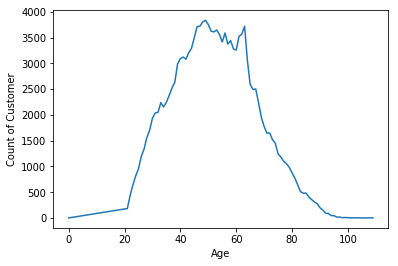

In [25]:
%matplotlib inline

plt.subplots(figsize=(6, 4))
df_age_cnt= training.iloc[:,3].value_counts(sort= False)

df_age_cnt.plot()


plt.xlabel('Age')
plt.ylabel('Count of Customer')

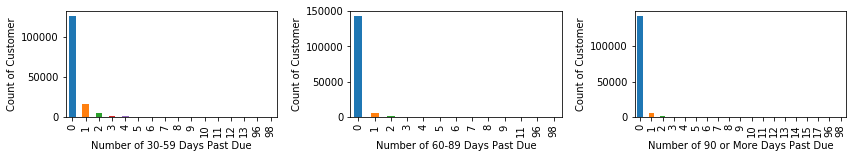

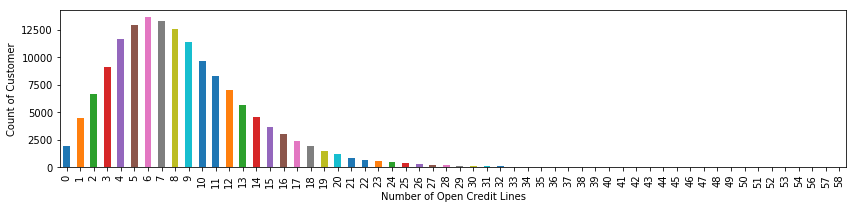

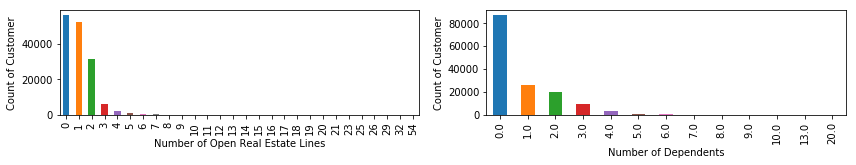

In [29]:
%matplotlib inline


fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(3, 3, 1)

training_3059_count= training.iloc[:,4].value_counts(sort= False)
training_3059_count.plot(kind='bar')
plt.xlabel('Number of 30-59 Days Past Due')
plt.ylabel('Count of Customer')

ax2 = fig.add_subplot(3, 3, 2)

training_6089_count= training.iloc[:,10].value_counts(sort= False)
training_6089_count.plot(kind='bar')
plt.xlabel('Number of 60-89 Days Past Due')
plt.ylabel('Count of Customer')

ax3 = fig.add_subplot(3, 3, 3)
training_90_count= training.iloc[:,8].value_counts(sort= False)
training_90_count.plot(kind='bar')
plt.xlabel('Number of 90 or More Days Past Due')
plt.ylabel('Count of Customer')

fig.tight_layout()


fig2 = plt.figure(figsize=(12, 3))
ax4 = fig2.add_subplot(1, 1, 1)




training_num_credit= training.iloc[:,7].value_counts(sort= False)
training_num_credit.plot(kind='bar')
plt.xlabel('Number of Open Credit Lines')
plt.ylabel('Count of Customer')

fig2.tight_layout()




fig1 = plt.figure(figsize=(12, 4))
ax4 = fig1.add_subplot(2, 2, 1)
training_num_credit= training.iloc[:,9].value_counts(sort= False)
training_num_credit.plot(kind='bar')
plt.xlabel('Number of Open Real Estate Lines')
plt.ylabel('Count of Customer')

ax5 = fig1.add_subplot(2, 2, 2)

training_num_credit= training.iloc[:,11].value_counts()
training_num_credit.plot(kind='bar')
plt.xlabel('Number of Dependents')
plt.ylabel('Count of Customer')




fig1.tight_layout()

Text(0, 0.5, 'Count of Customer')

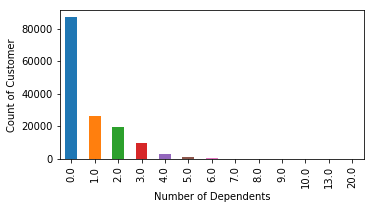

In [30]:
%matplotlib inline


fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(2, 2, 1)

training_num_credit= training.iloc[:,11].value_counts()
training_num_credit.plot(kind='bar')
plt.xlabel('Number of Dependents')
plt.ylabel('Count of Customer')

In [31]:
training.iloc[:,1].value_counts()


0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

([<matplotlib.axis.XTick at 0x7ff357574b38>,
 <a list of 2 Text xticklabel objects>)

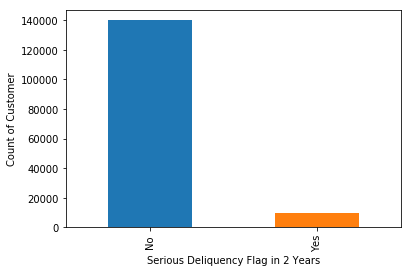

In [32]:
%matplotlib inline

categories=['No','Yes']
pos = np.arange(len(categories))
 
plt.subplots(figsize=(6, 4))

training.iloc[:,1].value_counts().plot(kind='bar')
plt.xlabel('Serious Deliquency Flag in 2 Years')
plt.ylabel('Count of Customer')

plt.xticks(pos, categories)


In [33]:
training.isnull().any()

Unnamed: 0                              False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [34]:
training['NumberOfDependents']= training['NumberOfDependents'].fillna((training['NumberOfDependents'].median()))


In [35]:
training['MonthlyIncome']= training['MonthlyIncome'].fillna(training['MonthlyIncome'].median())

In [36]:
training_prep=training.replace({'age': {0: training['age'].median()}}) 
training_prep.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295553,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,43301.414527,0.249746,249.755371,14.771249,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [37]:
training.all(axis=None)

False

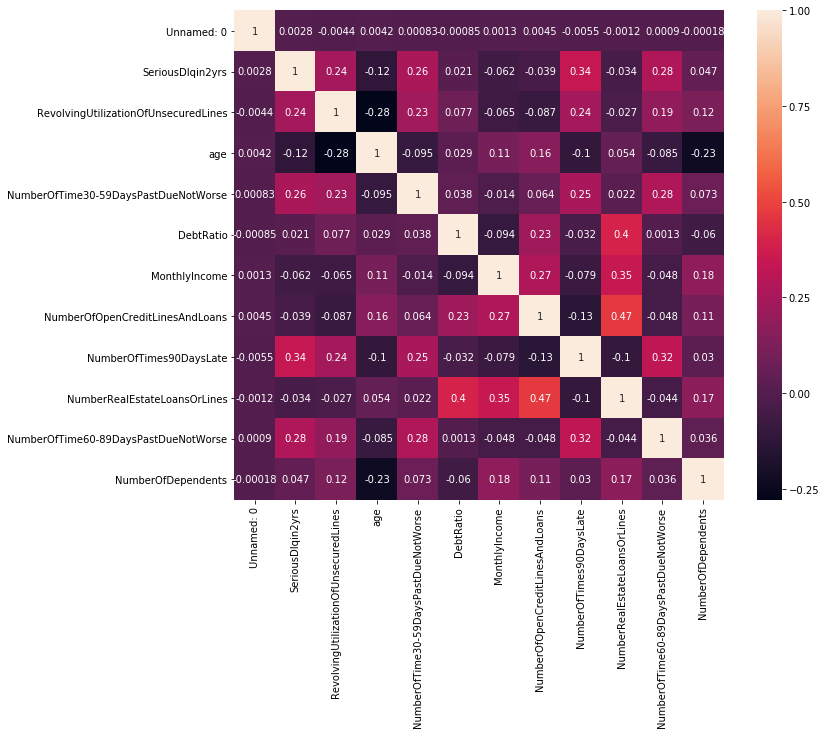

In [38]:
corr= training_prep.corr(method='spearman')

corr[1:2]

plt.subplots(figsize=(12, 9))

sns.heatmap(corr, square=True, annot=True);


In [39]:
training_prep=training_prep.drop('DebtRatio', 1)

In [40]:
training_prep

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45.0,2,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40.0,0,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38.0,1,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30.0,0,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49.0,1,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74.0,0,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57.0,0,5400.0,8,0,3,0,0.0
7,8,0,0.754464,39.0,0,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27.0,0,5400.0,2,0,0,0,0.0
9,10,0,0.189169,57.0,0,23684.0,9,0,4,0,2.0


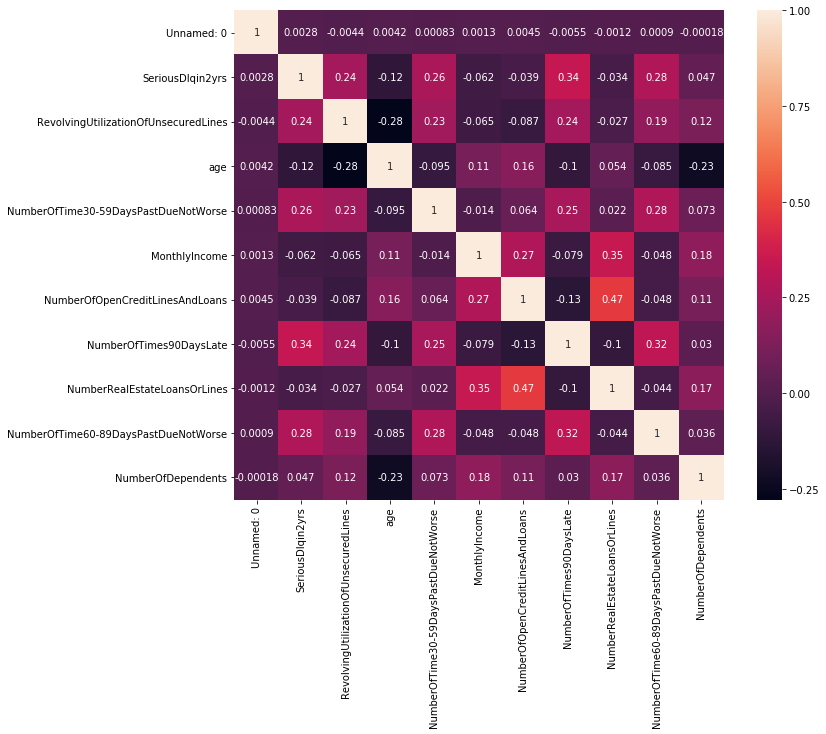

In [41]:
corr= training_prep.corr(method='spearman')

corr[1:2]

plt.subplots(figsize=(12, 9))

sns.heatmap(corr, square=True, annot=True);


In [42]:
training_prep['TotalNumberofTimesPastDue']= training_prep['NumberOfTime30-59DaysPastDueNotWorse'] + training_prep['NumberOfTime60-89DaysPastDueNotWorse'] + training_prep['NumberOfTimes90DaysLate'] 

In [21]:
training_prep

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TotalNumberofTimesPastDue
0,1,1,0.766127,45,2,9120.0,13,0,6,0,2.0,2
1,2,0,0.957151,40,0,2600.0,4,0,0,0,1.0,0
2,3,0,0.658180,38,1,3042.0,2,1,0,0,0.0,2
3,4,0,0.233810,30,0,3300.0,5,0,0,0,0.0,0
4,5,0,0.907239,49,1,63588.0,7,0,1,0,0.0,1
5,6,0,0.213179,74,0,3500.0,3,0,1,0,1.0,0
6,7,0,0.305682,57,0,5400.0,8,0,3,0,0.0,0
7,8,0,0.754464,39,0,3500.0,8,0,0,0,0.0,0
8,9,0,0.116951,27,0,5400.0,2,0,0,0,0.0,0
9,10,0,0.189169,57,0,23684.0,9,0,4,0,2.0,0


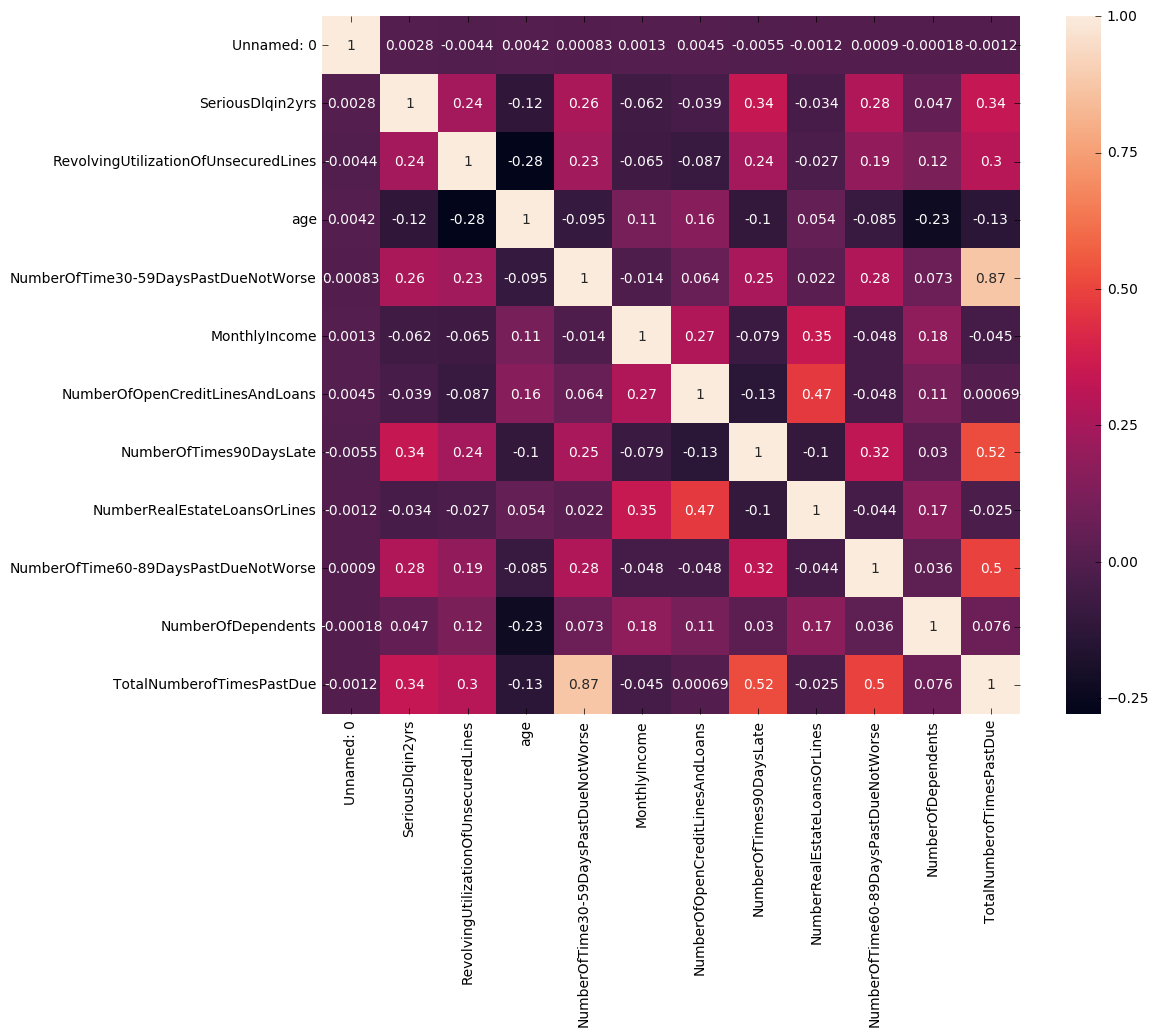

In [22]:
corr= training_prep.corr(method='spearman')

corr[1:2]

plt.subplots(figsize=(12, 9))

sns.heatmap(corr, square=True, annot=True);


In [23]:
training_prep=training_prep.drop('NumberOfTime30-59DaysPastDueNotWorse', 1)
training_prep=training_prep.drop('NumberOfTime60-89DaysPastDueNotWorse', 1)
training_prep=training_prep.drop('NumberOfTimes90DaysLate', 1)


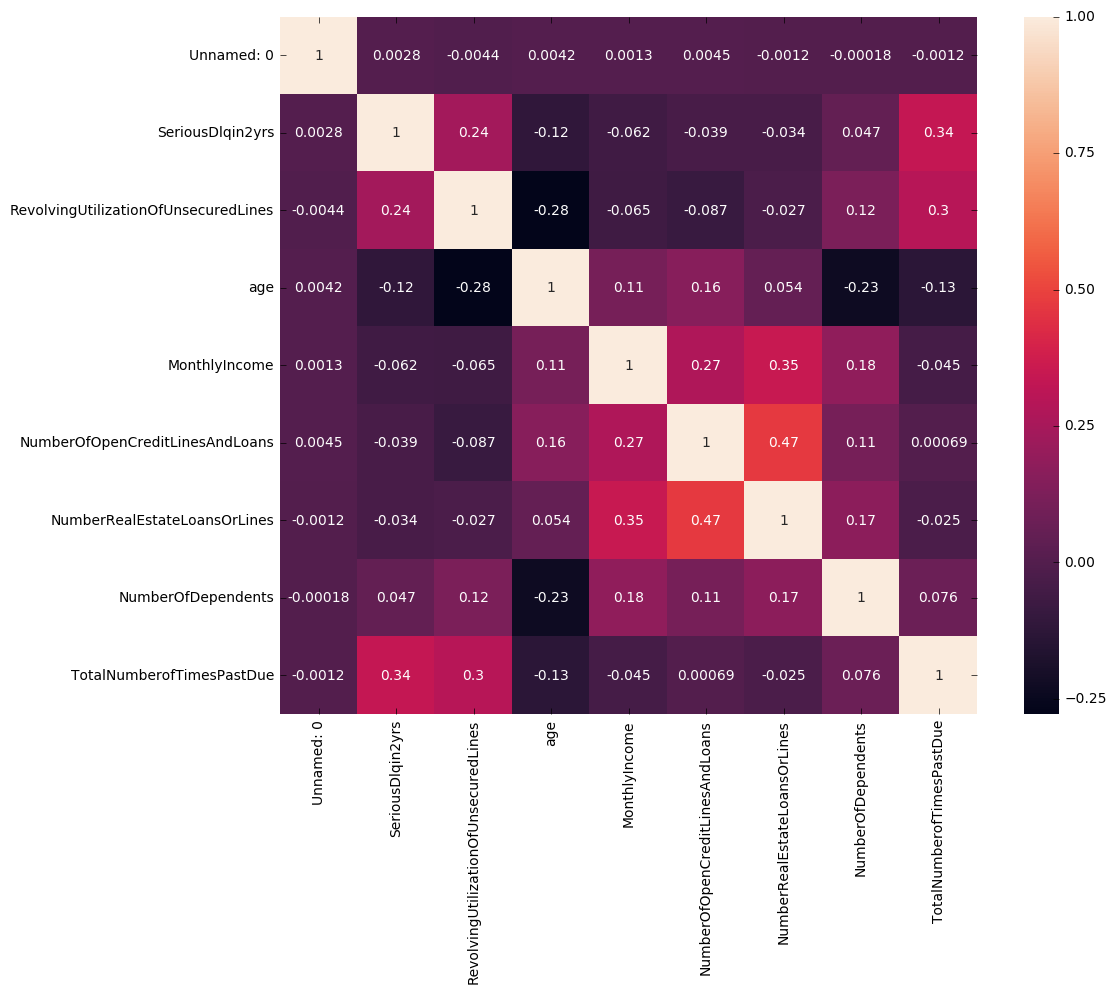

In [24]:
corr= training_prep.corr(method='spearman')

corr[1:2]

plt.subplots(figsize=(12, 9))

sns.heatmap(corr, square=True, annot=True);


In [25]:
training_prep['TotalNumberOfOpenLines']= training_prep['NumberOfOpenCreditLinesAndLoans'] + training_prep['NumberRealEstateLoansOrLines'] 

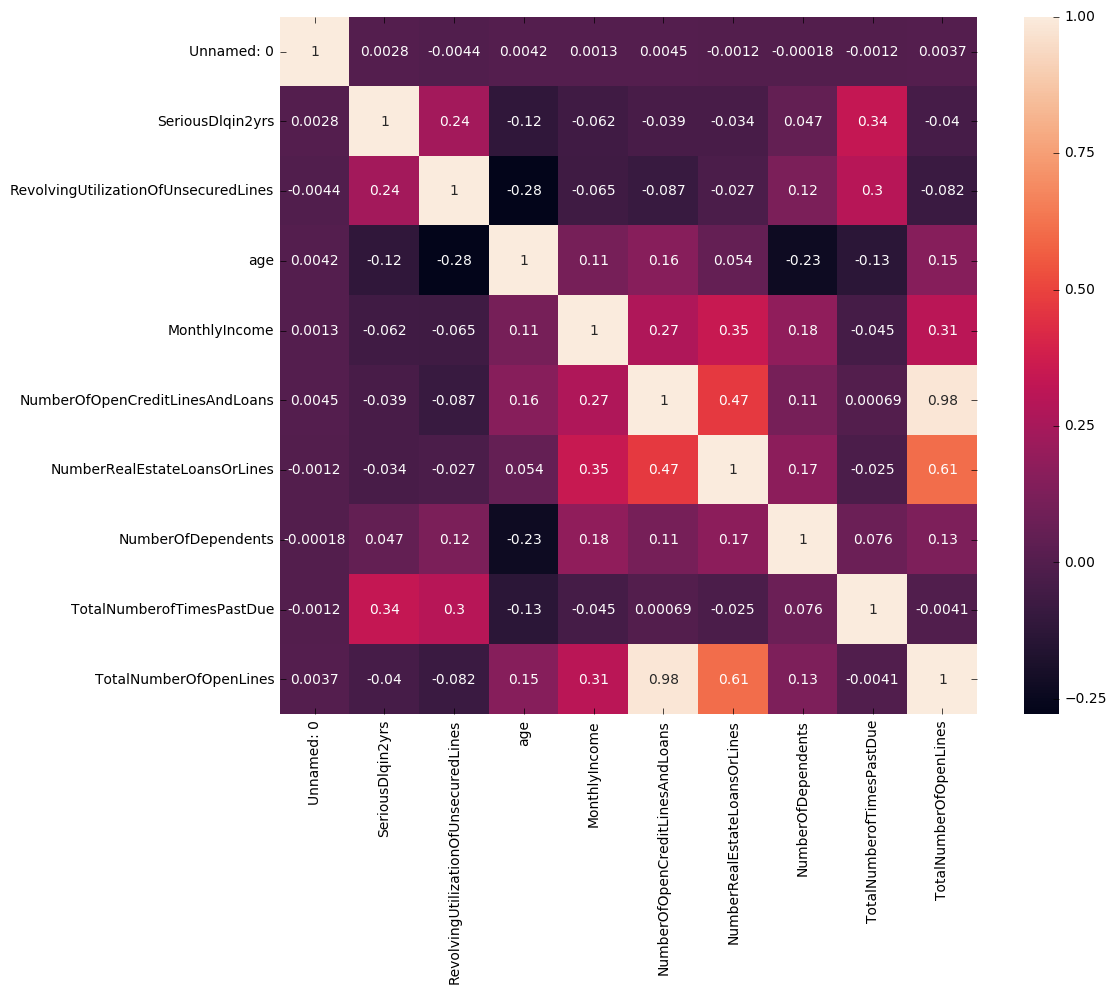

In [26]:
corr= training_prep.corr(method='spearman')

corr[1:2]

plt.subplots(figsize=(12, 9))

sns.heatmap(corr, square=True, annot=True);


In [27]:
training_prep=training_prep.drop('NumberOfOpenCreditLinesAndLoans', 1)
training_prep=training_prep.drop('NumberRealEstateLoansOrLines', 1)


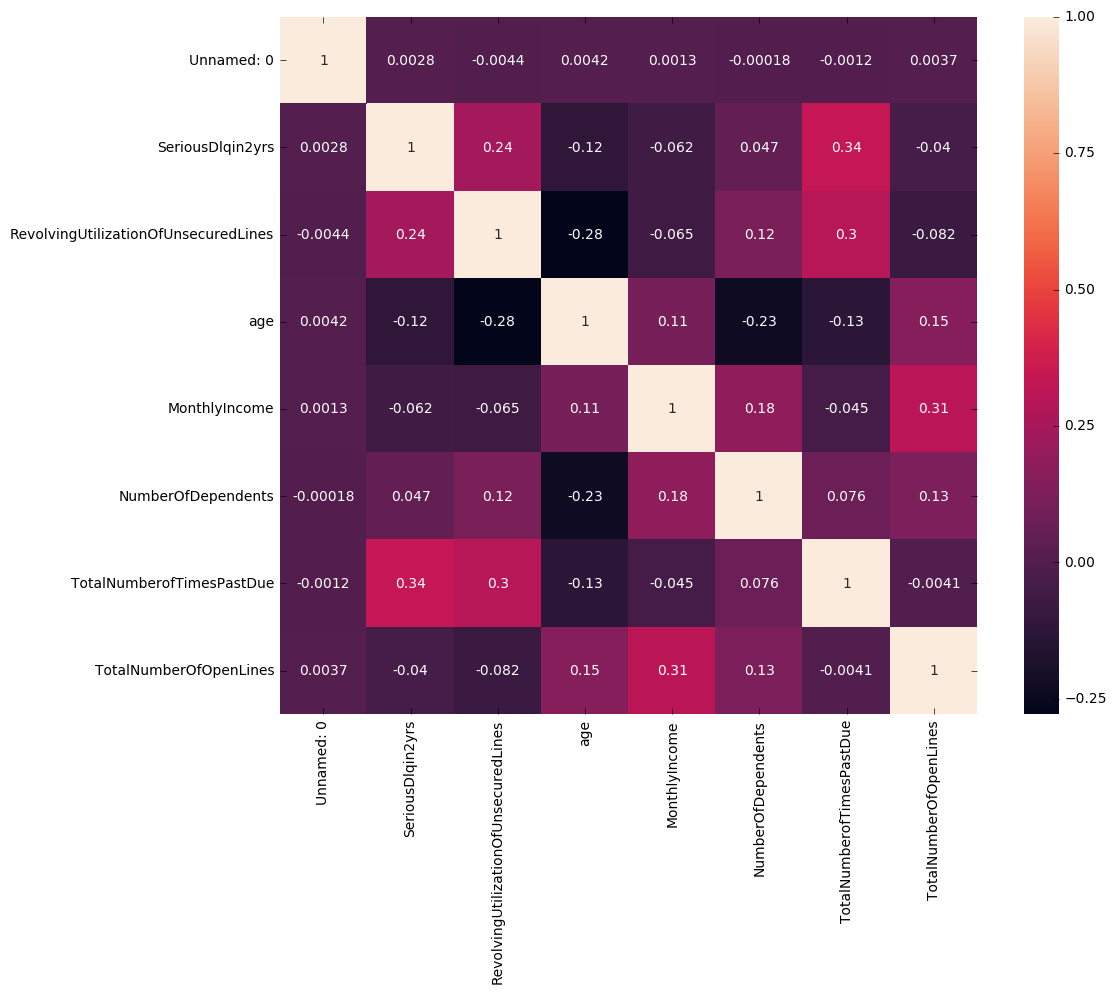

In [28]:
corr= training_prep.corr(method='spearman')

corr[1:2]

plt.subplots(figsize=(12, 9))

sns.heatmap(corr, square=True, annot=True);


In [82]:
training_prep=training_prep.drop('TotalNumberOfOpenLines', 1)


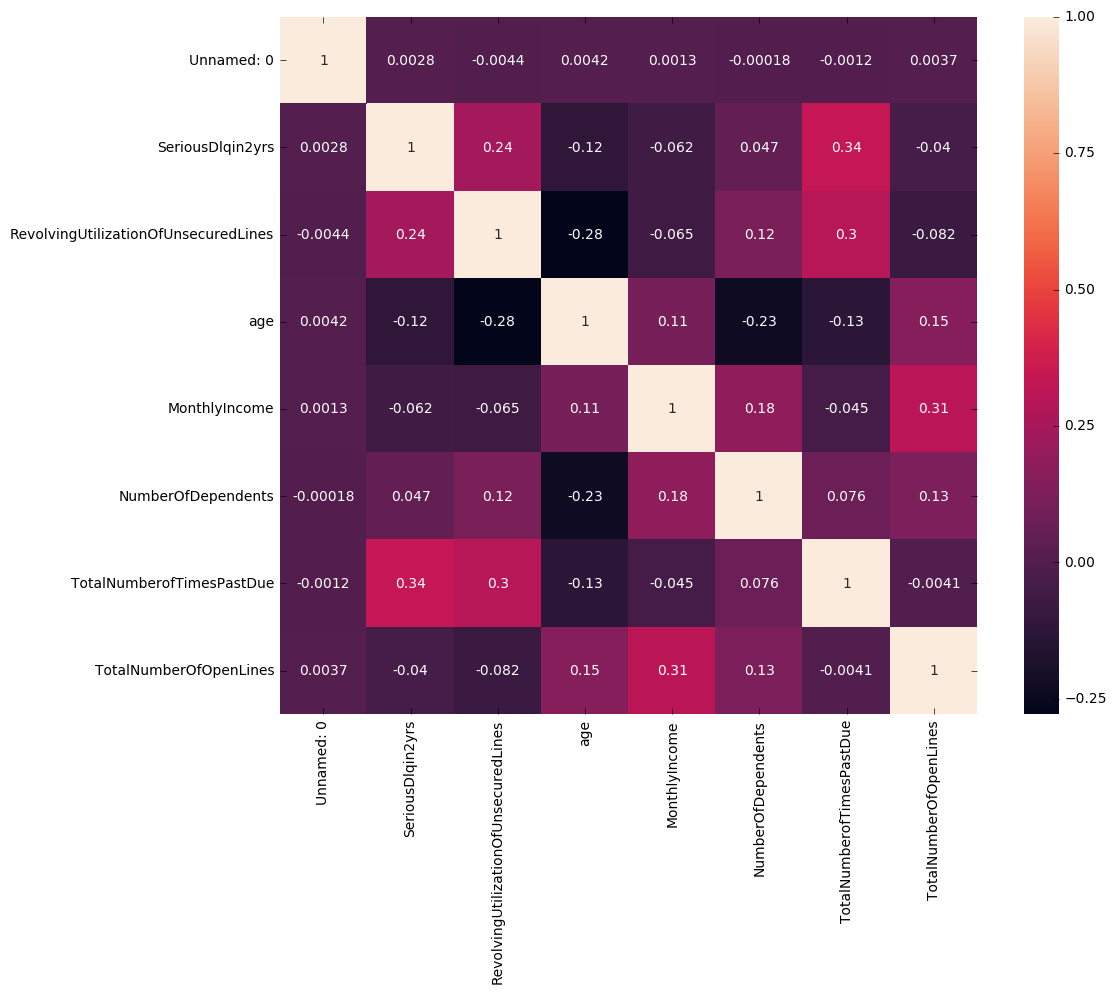

In [30]:
corr= training_prep.corr(method='spearman')

corr[1:2]

plt.subplots(figsize=(12, 9))

sns.heatmap(corr, square=True, annot=True);
